#### 20210711
Data cleaning has resulted in a better score. <br>
Try out few new thing. 

__Gold Standard__

In [4]:
{'mae': 0.6075432743210333,
 'mse': 0.9987348539176673,
 'rmse': 0.9993672267578456,
 'r2': 0.581624262678798,
 'msle': 0.01578527438221224,
 'rmsle': 0.1256394618828505}

{'mae': 0.6075432743210333,
 'mse': 0.9987348539176673,
 'rmse': 0.9993672267578456,
 'r2': 0.581624262678798,
 'msle': 0.01578527438221224,
 'rmsle': 0.1256394618828505}

In [26]:
## Catboost regressor class
%run setup/catboost_regression.ipynb

In [2]:
## utils functions
%run extras/lab_utils_cls.ipynb

In [79]:
## utils data clean
%run extras/data_clean_util.ipynb

In [3]:
test_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_math_company_hackathon/test.csv"
train_file_loc = "https://raw.githubusercontent.com/chrisdmell/DataScience/master/data_dump/01_math_company_hackathon/train.csv"

test  = Utils.load_data(test_file_loc)
train = Utils.load_data(train_file_loc)

#### 001

1. GridsearchCV has resulted in overfit models, so reluctant to try it again. The best model did just 100 iterations and not 1000. With 1k I still feel there is some overfit. The answer lies in the data??

2. The above was the old approach, rn clipping mileage at 40K and 0k and engine volume at 0 and 10. After the data cleaning we clipped the lower and upper bounds. <br>
__Clipping values dint add value as well.__ 

In [14]:
## best model yet 
{'mae': 0.5699370329978803,
 'mse': 0.9881485567334541,
 'rmse': 0.9940566164627919,
 'r2': 0.5890206396795866,
 'msle': 0.01614382297904979,
 'rmsle': 0.12705834478321285}

{'mae': 0.5699370329978803,
 'mse': 0.9881485567334541,
 'rmse': 0.9940566164627919,
 'r2': 0.5890206396795866,
 'msle': 0.01614382297904979,
 'rmsle': 0.12705834478321285}

3. Removing 3 variables - Wheels, turbo flag and cylinders. <br>
__Removing those 2 variables dint add value to the mode__

In [19]:
{'mae': 0.5726249398393628,
 'mse': 1.008630243720906,
 'rmse': 1.0043058516811032,
 'r2': 0.5805021324581502,
 'msle': 0.016416378588858846,
 'rmsle': 0.12812641643649778}

{'mae': 0.5726249398393628,
 'mse': 1.008630243720906,
 'rmse': 1.0043058516811032,
 'r2': 0.5805021324581502,
 'msle': 0.016416378588858846,
 'rmsle': 0.12812641643649778}

4. "od_type":"IncToDec" trying this new overfit detector on 100 iterations. The learning rate was low at 0.4 for 100 iterations. This could be the reason/<br>
'rmsle': 0.1328283342003898, has increased from 0.12 to 0.13 

5. Lets try the learning rate to be 0.8 with 100 iterations, and with od_type inctodec. This has a minor effect and results in higher error, There is no major effect when the iterations are 100. <br>
Lets check moving to 1000 gives us any better values. It is still worse, seems like 100 200 is about the best iterations. <br>

>5a. I am nearly confident now that the answer lies in the data. With 100 iterations I see a good model RSME score. To get the thrid significant boost in score, I might need to check the continuous variables and their effect on price and then change them to be gaussian in distribution, or may be some kinda relationship with price. 
<br> Should I check PCA?

In [101]:
train = pd.read_csv("cleaned_20210711_1551.csv")

In [ ]:
columns_to_keep = ["Manufacturer","Prod. year","Category","Leather interior","Fuel type", "Engine volume","Cylinders",
                   "Gear box type", "Mileage","turbo_flag_n", \
 "Drive wheels", "Wheel", "Airbags", "Price"]

cat_features = ["Manufacturer","Category","Leather interior","Fuel type", "Gear box type", "turbo_flag_n", 
 "Drive wheels", "Wheel"]

In [72]:
list(set(columns_to_keep) - set(cat_features))

['Mileage', 'Levy', 'Price', 'Engine volume']

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0:	learn: 1.5717196	total: 57.3ms	remaining: 57.3s
100:	learn: 1.1401423	total: 6.91s	remaining: 1m 1s
200:	learn: 1.1140358	total: 12.4s	remaining: 49.1s
300:	learn: 1.1113433	total: 17.1s	remaining: 39.6s
400:	learn: 1.0960880	total: 23.4s	remaining: 35s
500:	learn: 1.0829008	total: 30s	remaining: 29.9s
600:	learn: 1.0660231	total: 37.3s	remaining: 24.8s
700:	learn: 1.0491256	total: 44.5s	remaining: 19s
800:	learn: 1.0356848	total: 51.7s	remaining: 12.9s
900:	learn: 1.0226937	total: 58.8s	remaining: 6.46s
999:	learn: 1.0063666	total: 1m 6s	remaining: 0us


{'mae': 0.6508706144482309,
 'mse': 1.1345949911860655,
 'rmse': 1.0651736906186078,
 'r2': 0.5281123263066466,
 'msle': 0.018751371678897334,
 'rmsle': 0.13693564794784932,
 'model': <catboost.core.CatBoostRegressor at 0x1fc800bd8e0>,
 'y_test':            Price
 736    10.214092
 8674    9.244742
 5971   10.615702
 1957   10.564576
 11075  10.647874
 ...          ...
 18231  11.788411
 1082   10.493106
 6206    9.303557
 9124    5.398163
 1935    9.345570
 
 [4810 rows x 1 columns],
 'y_pred': array([10.1924785 ,  8.94269606,  8.52214622, ...,  9.69751183,
         6.09332408,  9.60899859]),
 'model_score': -7209.650479964456}

array([26701.59272268,  7651.79894359,  5024.8265618 , ...,
       16277.05660881,   442.89117426, 14898.24342256])

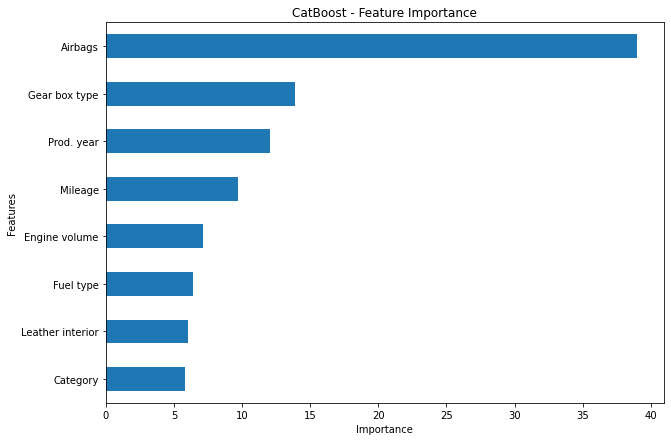

In [122]:
columns_to_keep = ["Manufacturer","Prod. year","Category","Leather interior","Fuel type", "Engine volume","Cylinders",
                   "Gear box type", "Mileage","turbo_flag_n", \
 "Drive wheels", "Wheel", "Airbags", "Price"]

cat_features = ["Manufacturer","Category","Leather interior","Fuel type", "Gear box type", "turbo_flag_n", 
 "Drive wheels", "Wheel"]

cat_features = [
 'Gear box type',
 'Leather interior',
 'Fuel type',
 'Category',]
columns_to_keep = list(fea_imp[fea_imp["imp"] > 4].col)  + ["Price"]

features_to_keep = train[columns_to_keep]

#features_to_keep["Price"] = np.log10(features_to_keep.Price)

features_to_keep[cat_features] = features_to_keep[cat_features].astype(str)


var_dict = {}
var_dict["independant"] =  list(set(columns_to_keep) - set(["Price"]))

var_dict["dependant"]   = ["Price"]

iter_verbo = 500

params = {"cat_features": cat_features, 
          "loss_function": "RMSE", 
          "iterations" : iter_verbo, 
          "verbose": iter_verbo,
          "learning_rate": 0.5, #0.8
          "depth": 12,   ##depth of the trees 12
          "l2_leaf_reg": 30, #30
          "random_strength": 0.1
#           "od_type":"IncToDec",
#           "od_wait" : 100  # wait till 50 iter to detect overfit
         
         }

# {'depth': 10, 'l2_leaf_reg': 40, 'learning_rate': 0.7}


params = {
            "cat_features": cat_features, 
            "loss_function": "RMSE", 
            "iterations" : 1000, 
          "verbose":100,
         'learning_rate': 0.05,
         'depth': 10,   ##depth of the trees
         'l2_leaf_reg': 40,
#     "one_hot_max_size": 4
#             "random_strength": 0.9
}

cat_model = catboost_regressor.new_instance(params)

cat_model_base_017 = cat_model.model_run_log(features_to_keep, var_dict )

cat_model.feature_importance(cat_model_base_017["model"], var_dict["independant"])

display(cat_model_base_017)


display(np.exp(cat_model_base_017["y_pred"]))

## 'rmsle': 0.12705834478321285

In [117]:
fea_imp = pd.DataFrame({'imp': cat_model_base_017["model"].feature_importances_, 'col': \
                        var_dict["independant"]})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[False, False]).iloc[-30:]
fea_imp.head()

,imp,col
3,40.043131,Airbags
0,11.329136,Prod. year
11,8.993338,Gear box type
2,8.380796,Mileage
4,5.442154,Leather interior


In [121]:
list(fea_imp[fea_imp["imp"] > 4].col) + ["Price"]

['Airbags',
 'Prod. year',
 'Gear box type',
 'Mileage',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Category',
 'Price']

In [80]:
new_1 = CarDataClean.clean_eng_vol(test)
new_1.head()

(8245, 18)
(8245, 19)


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,turbo_flag_n
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,non_turbo
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,non_turbo
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,non_turbo
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN,non_turbo


In [81]:
new_2 = CarDataClean.clean_mileage(new_1)
new_2.head()

(8245, 19)
(8245, 20)


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,turbo_flag_n,Mileage_avg
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,101825.5,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo,101825.500000
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,non_turbo,149978.098214
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,non_turbo,145801.142857
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,non_turbo,117750.000000
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,4,Manual,Front,04-May,Left wheel,Black,0,NaN,non_turbo,200000.000000


In [82]:
new_3 = CarDataClean.clean_levy(new_2)
new_3.head()

(8245, 20)
(8245, 21)


,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,...,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price,turbo_flag_n,Mileage_avg,Levy_avg
0,44020629,0,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0,101825.5,...,Manual,Front,02-Mar,Left wheel,Grey,10,NaN,Turbo,101825.500000,579.000000
1,45784798,0,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000.0,...,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN,non_turbo,149978.098214,550.767857
2,45800257,0,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000.0,...,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN,non_turbo,145801.142857,0.000000
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000.0,...,Automatic,4x4,04-May,Left wheel,Blue,12,NaN,non_turbo,117750.000000,947.000000
4,45814303,0,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000.0,...,Manual,Front,04-May,Left wheel,Black,0,NaN,non_turbo,200000.000000,0.000000


In [83]:
columns_to_keep = list(set(columns_to_keep) - set(cat_features))

# cat_features = ["Manufacturer","Category","Leather interior","Fuel type", "Gear box type", "turbo_flag_n", 
#  "Drive wheels", "Wheel"]


features_to_predict_df = test[columns_to_keep]

# features_to_predict_df[cat_features] = features_to_predict_df[cat_features].astype(str)


y_pred_log = cat_model_base_017["model"].predict(features_to_predict_df)

features_to_predict_df.head()
y_pred = np.exp(y_pred_log)

display(pd.DataFrame({"Price":y_pred}))

,Price
0,10.679457
1,6.908167
2,24.132548
3,11.299266
4,5.685536
...,...
8240,20.238045
8241,14.827207
8242,15.082565
8243,17.865231


In [84]:
prediction_20210711_c = pd.DataFrame({"Price":y_pred})
display(prediction_20210711_c.head())
display(prediction_20210711_c.shape)

,Price
0,10.679457
1,6.908167
2,24.132548
3,11.299266
4,5.685536


(8245, 1)

In [85]:
prediction_20210711_c.to_csv("prediction_20210711_2.csv", index = False)

In [41]:
cat_model_base_017["model"].get_leaf_values()

array([-0.20208255,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [43]:
borders = cat_model_base_017["model"].get_borders()

In [ ]:
cat_model_base_017["model"].plot_tree(0) 

#### Trying the method, that trains the model with complete data. 

In [27]:
cat_model = catboost_regressor.new_instance(params)
cat_model_base_017 = cat_model.model_run_log_complete(features_to_keep, var_dict )
display(cat_model_base_017)

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


0:	learn: 0.0250575	total: 107ms	remaining: 10.6s
99:	learn: 0.0176250	total: 9.76s	remaining: 0us


{'mae': 0.009934778956460992,
 'mse': 0.00033019164099324787,
 'rmse': 0.0181711761037432,
 'r2': 0.6190713185325316,
 'msle': 0.00011252134367201083,
 'rmsle': 0.010607607820428262,
 'model': <catboost.core.CatBoostRegressor at 0x1fc801452e0>,
 'y_pred': array([0.78659744, 0.78890129, 0.75547472, ..., 0.7981946 , 0.78253955,
        0.76235133]),
 'model_score': -28939.499728985575}

__CatBoostError: Invalid cat_features[1] = 2 value: index must be < 1.__ , this error means that your dataset contains 100 features with indices from 0 to 99. You are trying to declare a categorical feature with index 100 which is greater than [max index.](https://github.com/catboost/catboost/issues/626)

#### 20210711 0433

In [106]:
## make your own scorer for gridsearch
scorer = metrics.make_scorer(metrics.mean_squared_error)

params = {"cat_features": cat_features, "loss_function": "RMSE", "iterations" : 100, "verbose":100}

other_dict = {}
other_dict["param_grid"] = {'learning_rate': [0.7,0.8, 0.9],
                            'depth': [10,12,14,16],
                            'l2_leaf_reg': [20,25,30,35,40]}  ## ideal values are from 10 to 30 
other_dict["scoring"] = scorer
other_dict["cv"]      = 5  ## general practice to give 5 or 10

# print(features_to_keep.isnull().any())

cat_model = catboost_regressor.new_instance(params)

cat_model_cv_019 = cat_model.model_run_cv_log(features_to_keep, var_dict,  other_dict)

C:\Users\chris.dmello\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Prod. year          False
Engine volume       False
Gear box type       False
Mileage             False
Airbags             False
Price               False
Levy                False
Category            False
Leather interior    False
dtype: bool
0:	learn: 0.1613600	total: 39.1ms	remaining: 3.88s
99:	learn: 0.1202527	total: 3.93s	remaining: 0us


In [107]:
cat_model_cv_019["model"].best_params_

{'depth': 10, 'l2_leaf_reg': 40, 'learning_rate': 0.7}

1. LightLGM I could try
2. I think deep learning method should help, idk, I cannot seem to reduce the error under 1. 

In [109]:
display(cat_model_cv_019)

display(np.exp(cat_model_cv_019["y_pred"]))

{'mae': 0.0758397721637931,
 'mse': 0.018405323371093178,
 'rmse': 0.13566622044965054,
 'r2': 0.4619000696201129,
 'grid_search_ad.score': 0.018405323371093178,
 'msle': 0.002136907323302175,
 'rmsle': 0.046226694920815777,
 'model_score': 0.018405323371093178,
 'model': GridSearchCV(cv=5,
              estimator=<catboost.core.CatBoostRegressor object at 0x000001FC818E3070>,
              n_jobs=-1,
              param_grid={'depth': [10, 12, 14, 16],
                          'l2_leaf_reg': [20, 25, 30, 35, 40],
                          'learning_rate': [0.7, 0.8, 0.9]},
              scoring=make_scorer(mean_squared_error)),
 'y_test':           Price
 736    2.417171
 8674   2.326765
 5971   2.452358
 1957   2.447947
 11075  2.455124
 ...         ...
 18231  2.548539
 1082   2.441747
 6206   2.332489
 9124   1.856011
 1935   2.336558
 
 [4810 rows x 1 columns],
 'y_pred': array([2.38563005, 2.28493544, 2.24977799, ..., 2.34194815, 1.89133906,
        2.33223071])}

array([10.86590656,  9.82505195,  9.48562967, ..., 10.40148049,
        6.62823835, 10.30089425])

In [110]:
display(np.exp(cat_model_cv_019["y_pred"]))

array([10.86590656,  9.82505195,  9.48562967, ..., 10.40148049,
        6.62823835, 10.30089425])

In [ ]:
https://github.com/abhashpanwar/used-car-price-prediction

Plot residuals

Save pipeline and save model